In [33]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
#loading data
dt=pd.read_csv("Iris.csv")
dt.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#knowing about the data
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [5]:
dt.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
#checking for null values
dt.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

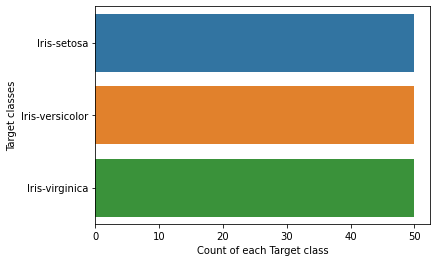

In [10]:
sns.countplot(y=dt['Species'] ,data=dt)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [12]:
data=dt.drop('Id',axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


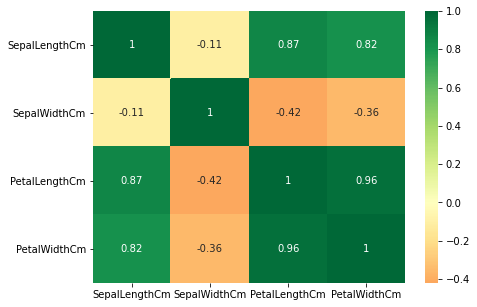

In [17]:
#data visualization
plt.figure(figsize=(7,5))
p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',center=0) 

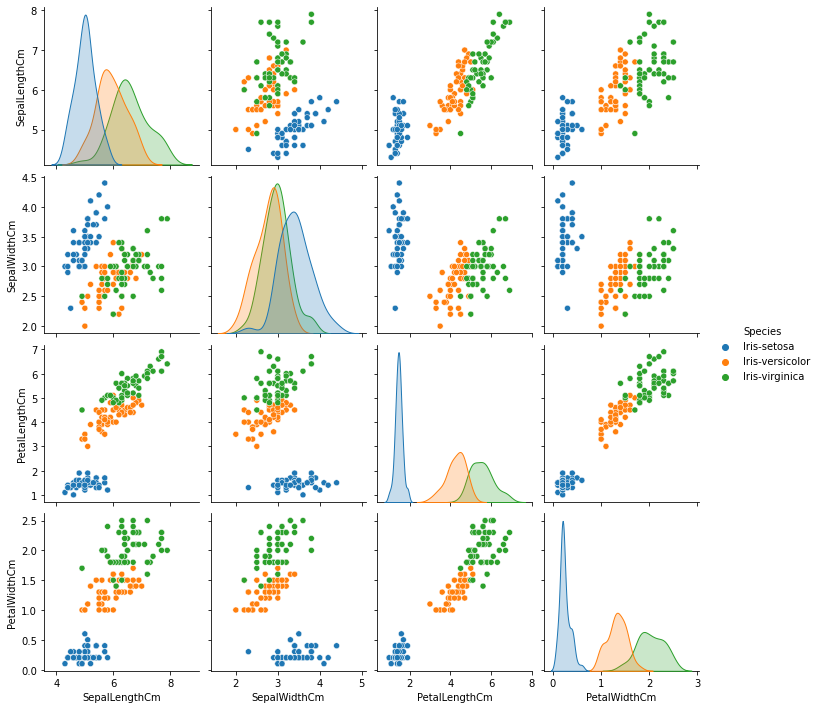

In [19]:
sns.pairplot(data,hue='Species')

In [20]:
X=data.drop(['Species'],axis=1)
y=data['Species']

In [21]:
#creating train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [25]:
#analysing using decision tree classifier algorithm
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
#predicting the values
y_pred=dt_model.predict(X_test)

In [29]:
accuracy_score(y_test,y_pred)

0.9777777777777777

In [38]:
confusion_matrix(y_pred,y_test)

array([[16,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 11]], dtype=int64)

In [41]:
print("\n Classification Report : \n",classification_report(y_test, y_pred))


 Classification Report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



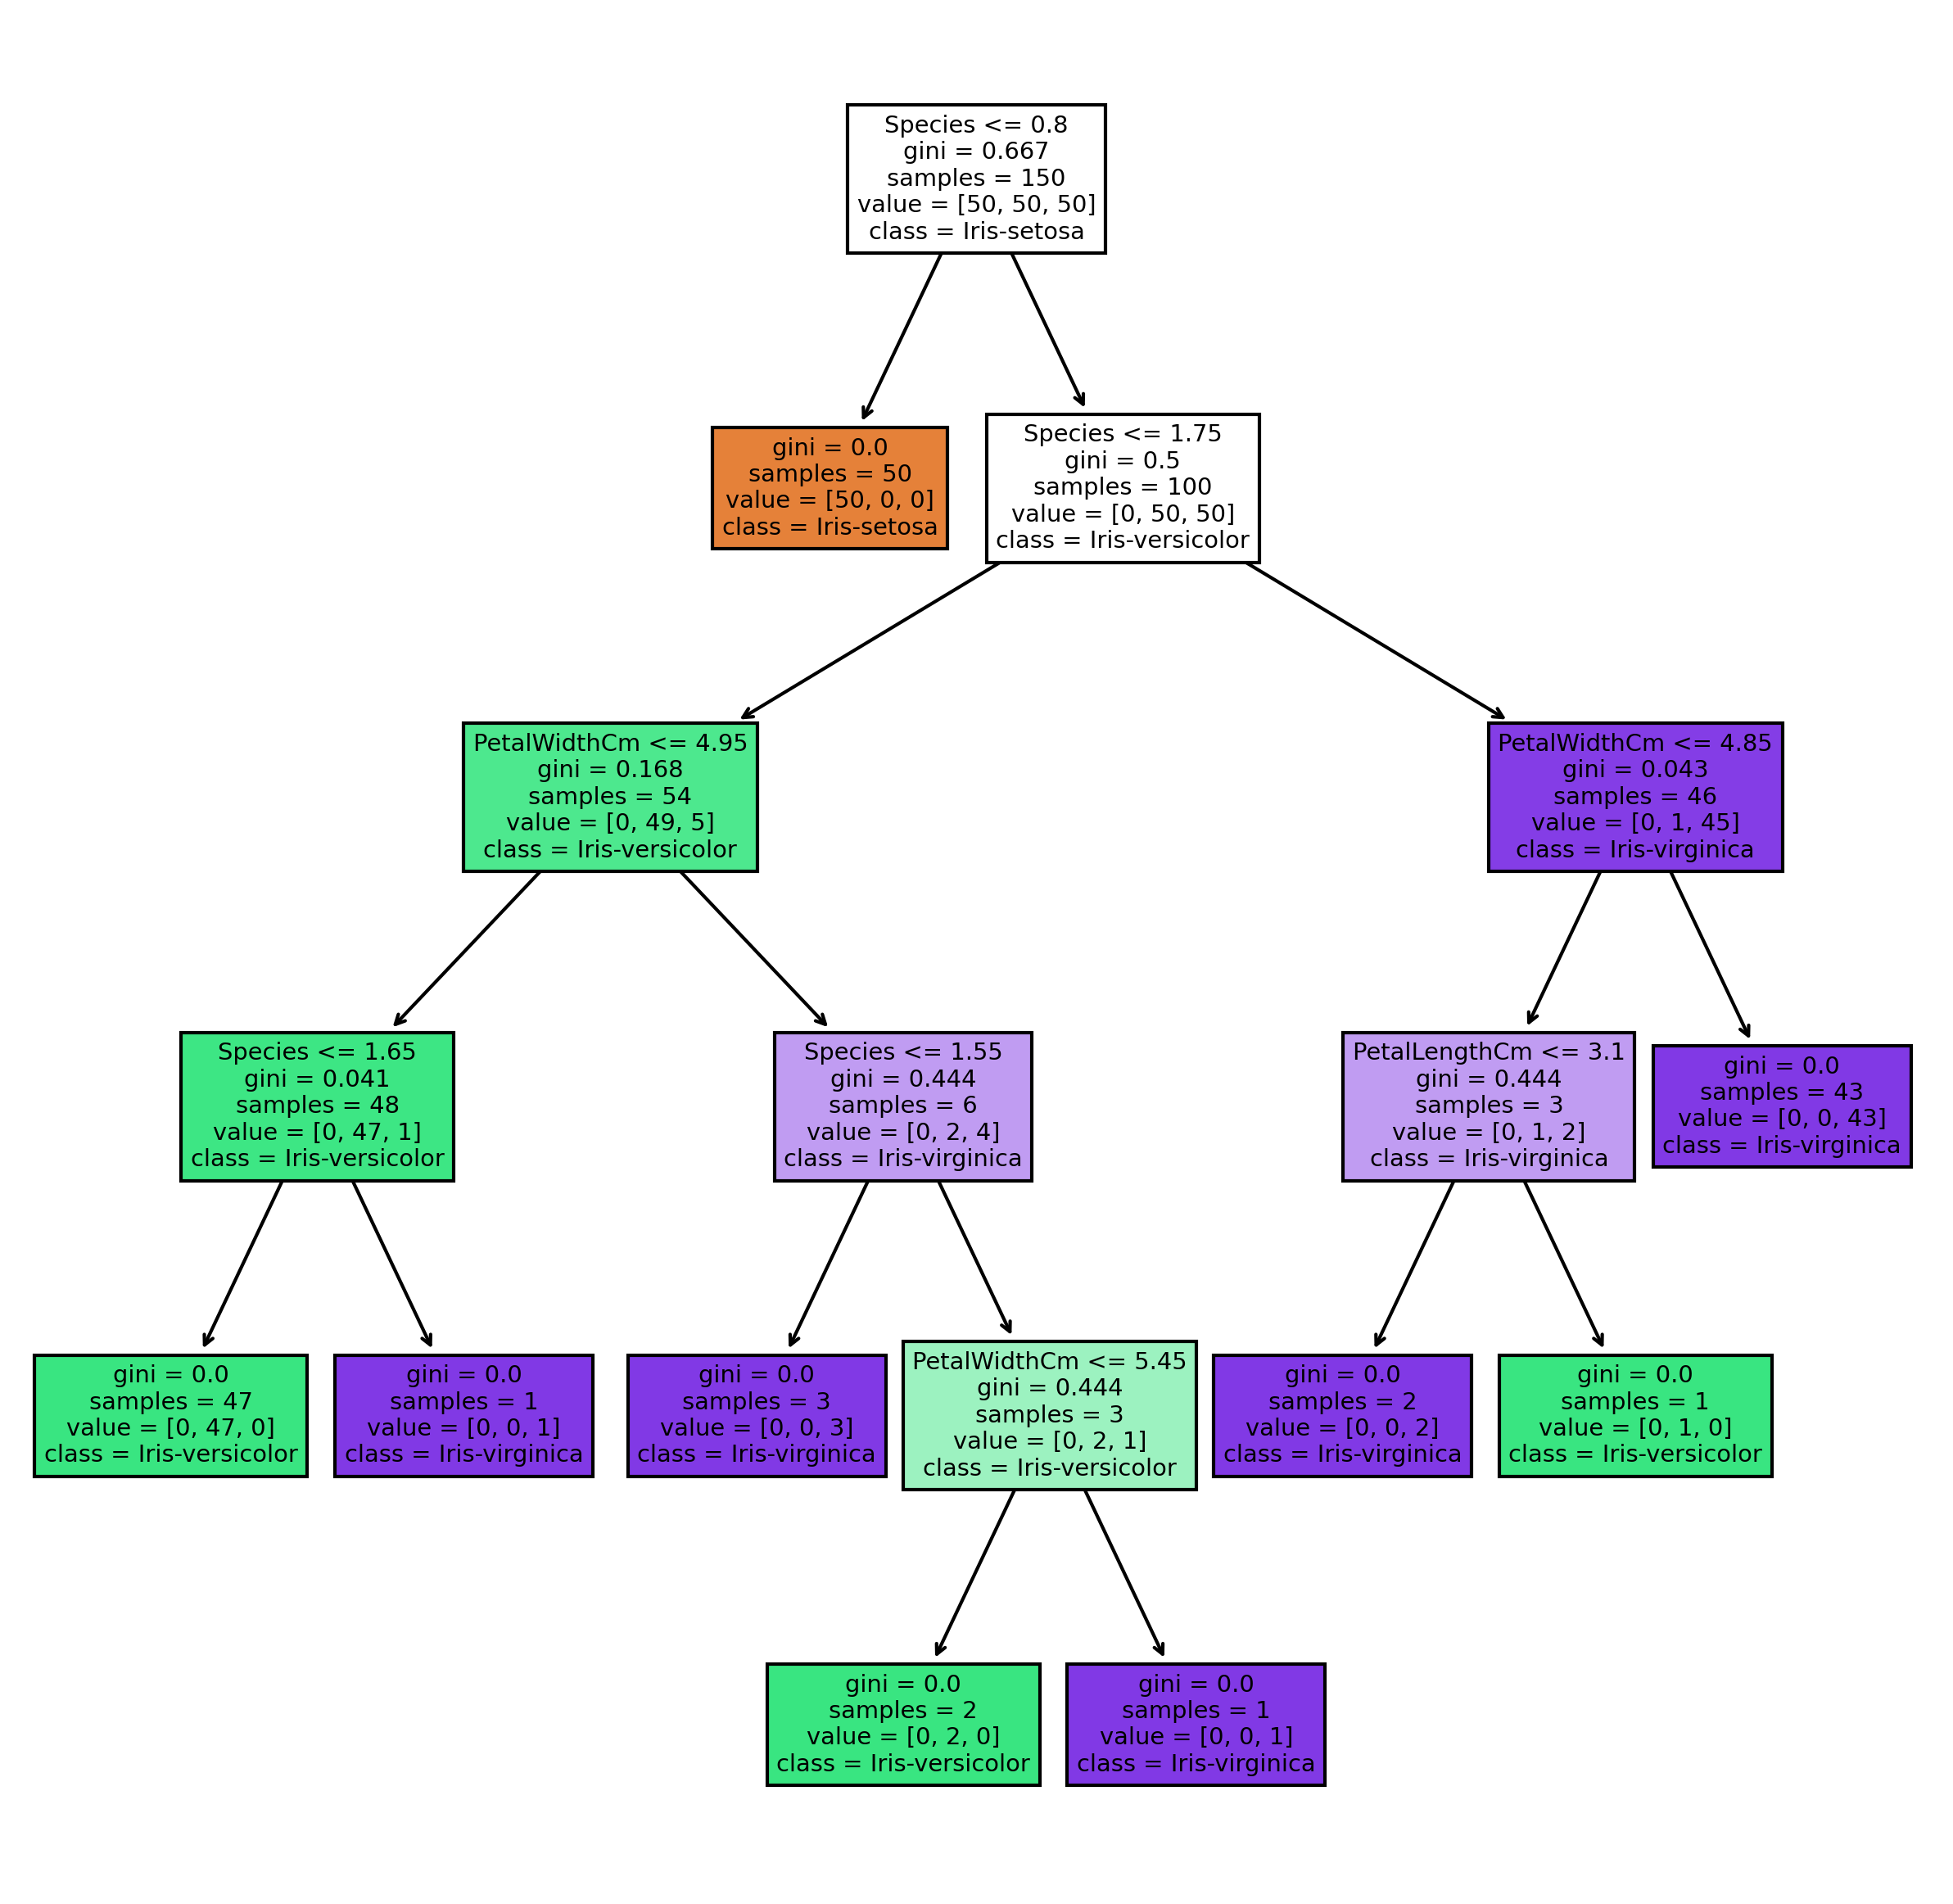

In [42]:
#visualizing the tree model
from sklearn.tree import plot_tree
features=data.columns[1:5]
classes=data['Species'].unique().tolist()
dt_model.fit(X,y)
fig,axes=plt.subplots(nrows=1,figsize=(10,10),dpi=300)
plot_tree(dt_model,feature_names=features,class_names=classes,filled=True);